# Intro til Toboksmodellen

I denne øvelsen ska vi gi en innføring i 2boksmodellen og hvordan vi ka bruke den til å beregne ændringer i jordens temperatur over tid. Toboksmodellen er en forenklet klimamodell. Den ser på hvordan energibalancen på jorden endrer seg utfra endringer i de ulike strålingspådrivene, fx. drivhusgasser, vulkansk aktivitet og variationer i solens aktivitet. 

Toboksmodellen består av to "bokser"; en for det øverste laget i havet (blandingslaget) og en for dybhavet. 

<img src="bilder/2D_model_schematic.png">

Figuren over viser at der er en balanse mellom den stråling som går inn og ut på toppen av atmosfæren (TOA), samt de energiovergangene vi har på grensen mellom atmosfæren og det øverste laget i havet ($\Delta Q$), samt at det går noe varme fra havets blandingslag til dyphavet. 

De som ønsker å forstå hvordan man kommer frem til formlene for beregning av temperaturendring som følge av endringer i strålingspådrivet anbefales å lese kompendiet *Climate Sensitivity*. Der vises det hvordan vi kommer frem til likningene under. Disse likningene er kodet og ligger i en Python-fil i mappen deres. Filen heter `toboks.py`.

$c_{mix}$ og $c_{deep}$ forteller om varmekapasiteten til overflatelaget i havet og i dyphavet. $\Delta T_s$ gir endringer i overflatetemperaturer, mens $\Delta T_o$ endringer i temperaturen i dyphavet. $\lambda$ er tilbakekoblingseffekter (*climate feedbaks*), og $\gamma$ beskriver effektivitetet av varmeopptak i dybhavet.

$$\begin{align}
c_{mix}\dfrac{d\Delta T_s}{dt}&=\Delta Q-\lambda \Delta T_s -\gamma (\Delta T_s -\Delta T_0)     \qquad   (\mathit{1}) \\
c_{deep}\dfrac{d\Delta T_o}{dt}&=\gamma (\Delta T_s - \Delta T_o)  \qquad   (\mathit{2}) 
\end{align}$$


In [5]:
# Lese inn relavente python pakker vi ska bruke
import pandas as pd
import matplotlib.pyplot as plt

#inkluder denne linjen om du vil åpne i Jupyter Notebook og vil lage interaktive plott
%matplotlib inline 

from toboks import calculate_temp_anomalies # henter funksjonen som beregner temperaturanomalier basert på toboksmodellen


## Sette op ToBoksModellen
For at sette opp modellen, må vi først hente inn data for de ulike *strålingspådriv* og beregne det totale pådriv ($\Delta$Q). Dernæst må vi bestemme hvilke *tilbagekoblingsfaktorer ($\lambda$)* som modellen ska ta med samt sette verdien for *effektiviteten av varmeopptak i havet ($\gamma$)*. Dette bruker 2boksmodellen som "input" for å lage beregninger.

### 1. Bestem strålingspådrivene

I denne øvelsen tar vi utgangspunkt i historisk data for perioden 1750-2011 som er basert på observationer. Dataene kommer fra den nyeste IPCC rapporten AR6 (for mer infomation se kapitel 7: https://www.ipcc.ch/report/ar6/wg1/downloads/report/IPCC_AR6_WGI_Chapter07.pdf)

Her ser vi på følgene strålingspådriv:

- drivhusgasser 
- solinnstråling
- vulkanisme
- arealbruk 
- aerosoler (menneskeskapte)

Det totale strålingspådriv ($\Delta$Q) er givet ved:

$$\begin{align}
\Delta Q=\Delta Q_{drivhus} + \Delta Q_{sol} + \Delta Q_{vulkan} + \Delta Q_{arealbruk} + \Delta Q_{aerosoler} 
\end{align}$$


In [14]:
# les inn historisk data fra filen 'historical_IPCC6.csv'
df=pd.read_csv('forcing-files/historical_IPCC6.csv',index_col = 0,sep=',',encoding = "utf-8")

# vis data rammen
df

,drivhusgasser,solinnstråling,vulkanisme,arealbruk,aerosoler
År,,,,,
1750,0.000,0.098,0.200,0.000,0.000
1751,0.002,0.079,0.200,0.000,0.005
1752,0.004,0.049,0.200,0.000,0.009
1753,0.006,0.013,0.200,-0.001,0.005
1754,0.008,-0.021,0.200,-0.001,-0.003
...,...,...,...,...,...
2015,3.139,0.029,0.110,-0.199,-1.117
2016,3.195,-0.008,0.127,-0.199,-1.087
2017,3.233,-0.017,0.151,-0.199,-1.063


### Plot de ulike strålingspådriv

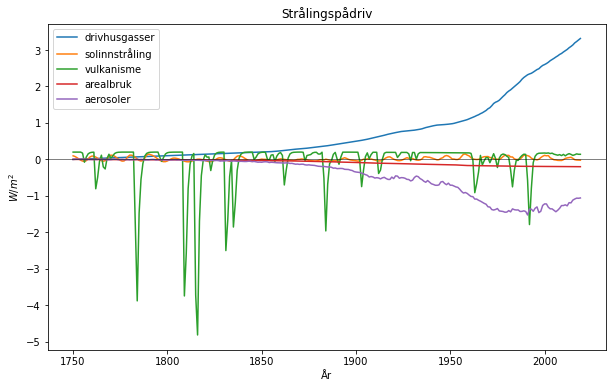

In [21]:
df.plot(title="Strålingspådriv",ylabel="$W/m^2$", figsize=(10,6))
plt.axhline(y=0, linewidth=0.7, color="black", alpha=0.7)


## Spørgsmål - Del I

* Hvilke av de nevnte strålingspådriv er naturlige og hvilke er menneskeskapte?

* Hva er betydningen av et negativt (positivt) strålingspådriv?

* Hvordan tror du et negtativt (positivt) strålingspådriv påvirker overflatetemperaturen på Jorden?


### Finn samlet strålingspådriv
I koden under lages en ny variable i vor dataramme som inneholder det totale pådriv.

<function matplotlib.pyplot.legend(*args, **kwargs)>

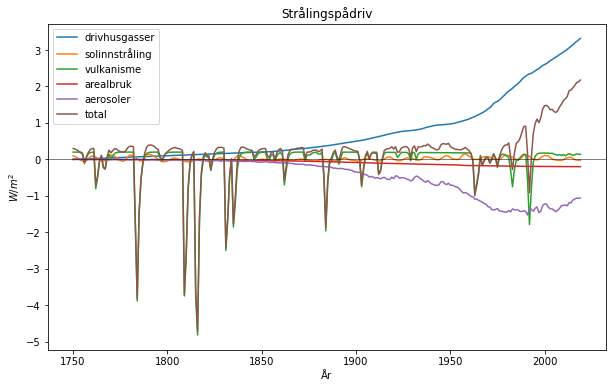

In [23]:
# Beregn og plot det totale strålingspådriv
df['total'] = switch_ghg*df['drivhusgasser']+switch_solar*df['solinnstråling']+switch_volc*df['vulkanisme']+switch_land*df['arealbruk']+switch_aero*df['aerosoler']

# plot
df.plot(title="Strålingspådriv",ylabel="$W/m^2$", figsize=(10,6))
plt.axhline(y=0, linewidth=0.7, color="black", alpha=0.7)
plt.legend

## Spørgsmål - Del II

* Hvilken av de ulike faktorer har den største betydningen for det totale strålingspådrivet før år 1900?

* Er der en endring i hvilken faktor som er den viktigste etter år ca. 1900?


### 2. Bestem tilbakekoblingsfaktorer (climate feedbacks)

Værdiene for de ulike tilbakekoblingsfaktorer er hentet fra *Soden and Held (2006)* og er basert på output fra 14 ulike klimamodeller som bidrar til IPCC rapporten. 

<img src="bilder/table_lambda_values.png" style="width:70%">


In [24]:
# CMIP5 values
lambda_planck=-3.21     # Stefan Boltzmann's 'feedback' [Wm-2K-1] best guesses  [-3.3 to -3.1]
lambda_lapse=-0.84      # Lapse rate feedback [Wm-2K-1] best guesses [-1.2 to -0.5]
lambda_water=1.8       # water vapor feedback [Wm-2K-1] best guesses [1.5 to 2.2]
lambda_cloud=0.69      # Clouds feedback [Wm-2K-1] best guesses [0.1 to 1.2]
lambda_albedo=0.26     # Surface albedo feedback [Wm-2K-1] best guesses [0.1 to 0.4]
lambda_other=0.0       # Other feedbacks [Wm-2K-1]

lambda_sum=sum([lambda_planck,
    lambda_lapse,
    lambda_water,
    lambda_cloud,
    lambda_albedo,
    lambda_other])

### 3. Bestem varmeoptakk til dybhavet

In [25]:
# Deep ocean heat uptake efficency [Wm-2K-1] fra Dufresne and Bony (2008).
gamma=-0.69  # best guesses [-1 to -0.5]

## Beregn temperaturendringer for perioden 1750-2011 med Toboksmodellen
Vi ønsker nå å beregne hvordan temperaturen endrer seg som resultat av strålingspådrivet, verdiene vi har satt for tilbakekoblingsmekanismer, og varmeutveksling til dybhavet. 

In [26]:
Ts, To = calculate_temp_anomalies(df['total'].to_numpy(), lambda_sum, gamma) # kaller opp funksjonen som regner ut temperaturendringene

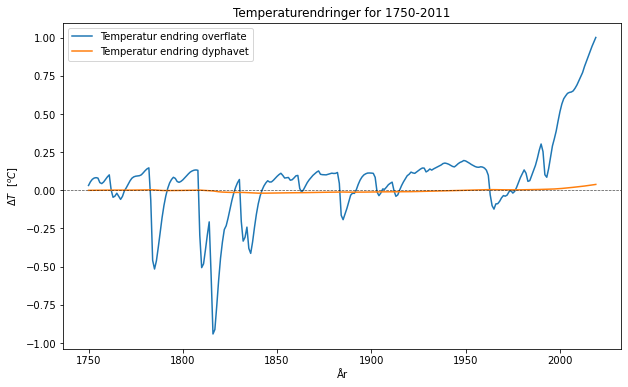

In [39]:
temp = pd.DataFrame(index=df.index) # vi lager en ny dataramme som har samme indexer (i.e. årstal) som pådrivet
temp['Temperatur endring overflate']=Ts
temp['Temperatur endring dyphavet']=To
temp.plot(ylabel="$\Delta T$  $[^oC]$", title="Temperaturendringer for 1750-2011", figsize=(10,6))
plt.axhline(y=0, linewidth=0.7, color="black", alpha=0.7, linestyle='--')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2e513c3700>,
      dtype=object)

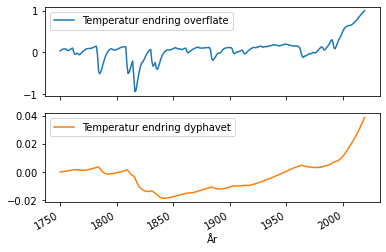

In [30]:
# samme plot men i hver sin figur
temp.plot(subplots=True)

### Beregn temperaturendringen relativ til år 1750

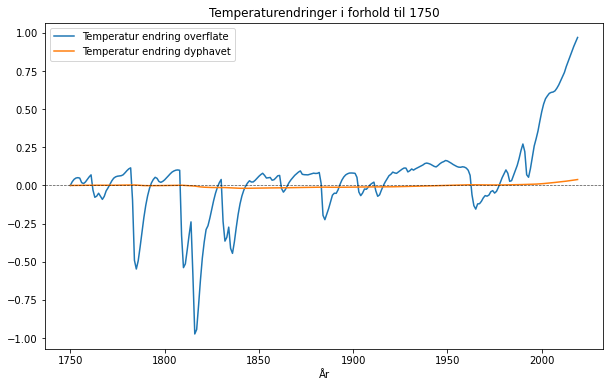

In [41]:
Tanom = temp - temp.loc[1750]
Tanom.plot( title="Temperaturendringer i forhold til 1750", figsize=(10,6))
plt.axhline(y=0, linewidth=0.7, color="black", alpha=0.7, linestyle='--')

### Finn temperaturen for et bestemt år

In [47]:
# velg år
år = 2011

Tloc = Tanom.loc[år]
Tloc
print('Relativ temperaturendring (overflate) i år', år, ':', "%.2f" %(Tloc['Temperatur endring overflate']),'°C')

Relativ temperaturendring (overflate) i år 2011 : 0.71 °C


### Temperaturendringer oppdelt etter strålingspådriv 
Noen ganger så ønsker man bare å studere effektene av eksempelvis solens aktivitet. I koden under beregner vi temperaturendringene for hver av de ulike strålingspådriv.  

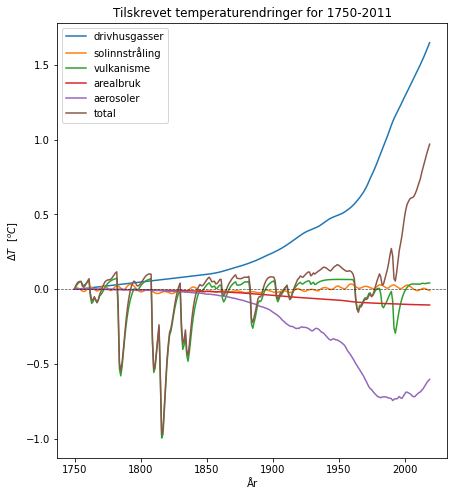

In [57]:
temp = pd.DataFrame(index=df.index) # vi lager en ny dataramme som har samme indexer (i.e. årstal) som pådrivet

temp['drivhusgasser'], To = calculate_temp_anomalies(df['drivhusgasser'].to_numpy(), lambda_sum, gamma)
temp['solinnstråling'], To = calculate_temp_anomalies(df['solinnstråling'].to_numpy(), lambda_sum, gamma)
temp['vulkanisme'], To = calculate_temp_anomalies(df['vulkanisme'].to_numpy(), lambda_sum, gamma)
temp['arealbruk'], To = calculate_temp_anomalies(df['arealbruk'].to_numpy(), lambda_sum, gamma)
temp['aerosoler'], To = calculate_temp_anomalies(df['aerosoler'].to_numpy(), lambda_sum, gamma)
temp['total'], To = calculate_temp_anomalies(df['total'].to_numpy(), lambda_sum, gamma)

# Beregn og plot endring ifht år 1750
Tanom1750 = temp - temp.loc[1750]

Tanom1750.plot(ylabel="$\Delta T$  $[^oC]$", title="Tilskrevet temperaturendringer for 1750-2011", figsize=(7,8))
plt.axhline(y=0, linewidth=0.7, color="black", alpha=0.7, linestyle='--')

## Spørgsmål - Del III

* Forklar hva du ser på plottet. 
    * Ka du si noe om endringene i overflatetemperaturen ($T_s$) gjennom perioden 1750-2011?
* Hvor mye har overflatetemperaturen (*Ts*) endret sig i forhold til år 1750? 

* Hva er den primære årsakken til denne endringen?


## Sammenlikne med obsevert temperaturendringer (EKSTRA???)

* Hvordan passer vores plot med det fra IPCC rapporten (AR6)?

Figuren under viser den obseverte samt simulert endring i global middelstemperatur hentet fra den seneste IPCC rapporten (AR6).  

<figure>
<img src="bilder/AR6_figSPM1b-600x528.png" >
<figcaption align = "center"> Source: AR6 Fig SPM1b</figcaption>
</figure>